# Accuracy of Taylor series approximation with Gaussian input

In deriving the equations (see maths working), we have:

$$\int_{-\infty}^\infty x_n(t + \Delta t) A_\pm e^\frac{-|\Delta t|}{\tau_S} \text{ d}\Delta t \\\approx \kappa_S x_n(t) + \kappa_A \dot x_n(t)$$

Where:

$$\begin{align*}
	\kappa_S &= \int_{-\infty}^0 A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t \\
	\kappa_A &= \int_{-\infty}^0 \Delta t A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty \Delta t A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t
\end{align*}$$

Basically, we assume $x$ is linear over the timescale of integration of the STDP kernel.

Therefore, the weight distribution is given by:

$$\begin{align*}
	w_{mn} &= \frac{1}{\gamma r_n} \int_0^T x_m(t) \int_{-\infty}^\infty x_n(t + \Delta t) A_\pm e^\frac{-|\Delta t|}{\tau_S} \text{ d}\Delta t \text{ d} t\\
	&\approx \frac{\kappa_S}{\gamma r_n} \langle x_m, x_n \rangle + \frac{\kappa_A}{\gamma r_n} \langle x_m, \dot x_n \rangle
\end{align*}$$

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('figure', figsize=(12.0, 8.0))

## Asymmetrical kernel

In this case we use a completely asymmetric kernel, so $\kappa_S = 0$, and so $w_{mn}$ is approximately proportional to $\langle x_m, \dot x_n \rangle$

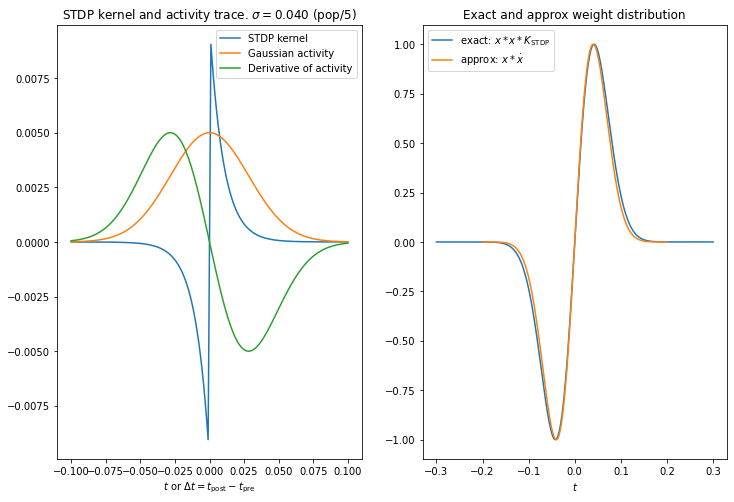

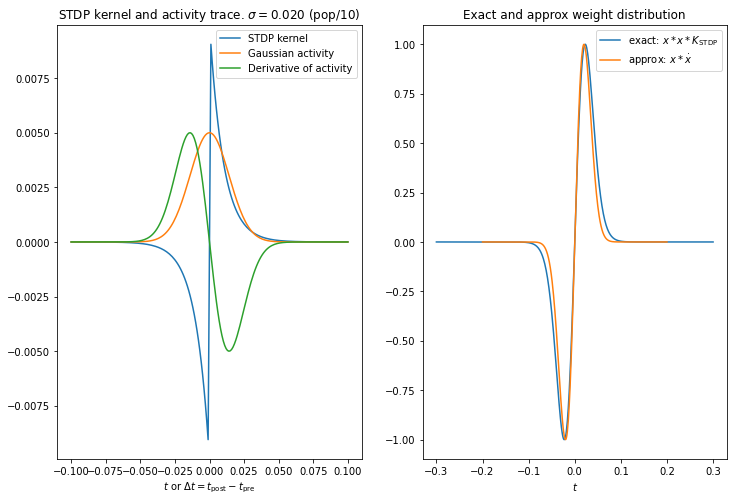

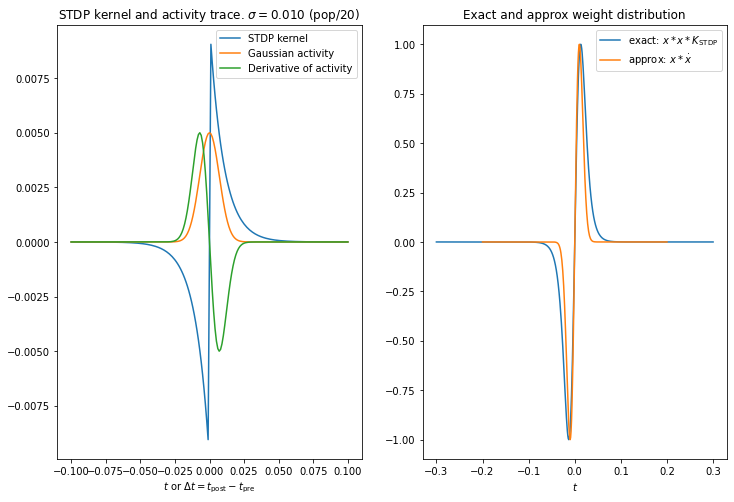

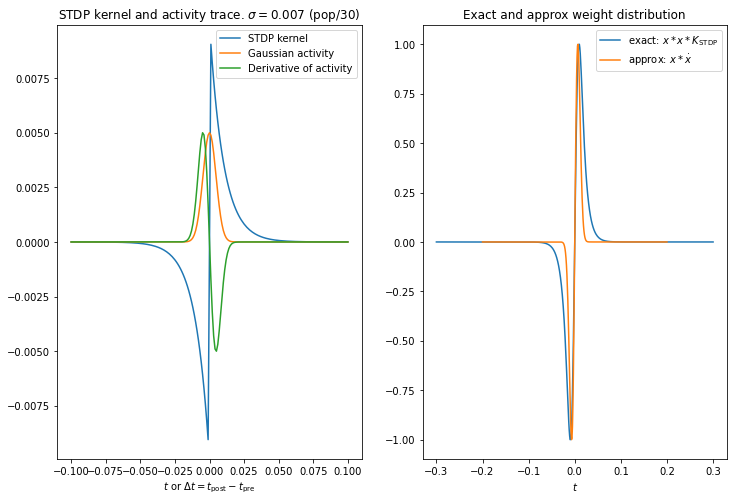

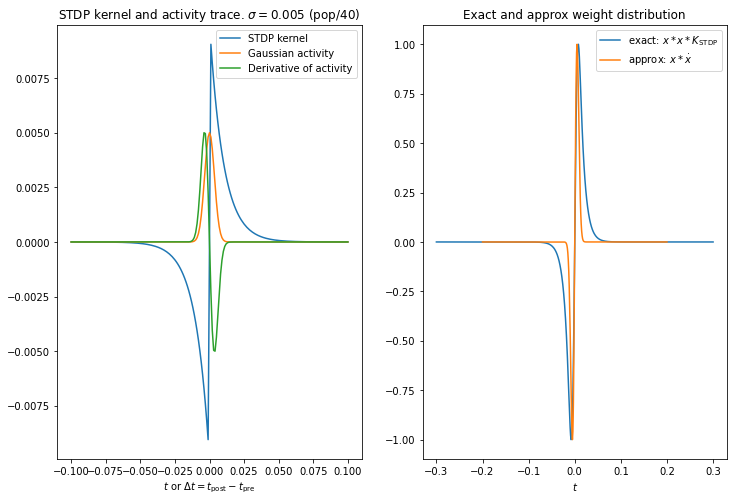

In [24]:
A_plus = 1e-2
A_minus = -1e-2
tau_stdp = 10e-3
num_neurons = 200
dt = 1e-3

# simulation parameters
num_neurons = 200
bump_speed = 1 # neurons / ms
period = num_neurons // bump_speed # ms

stdp_kernel = lambda delta_t: (A_plus * (delta_t > 0) + A_minus * (delta_t < 0) + (A_minus + A_plus)/2 * (delta_t == 0)) * np.exp(-abs(delta_t) / tau_stdp)
gaussian = lambda t,sigma: 1/(sigma*np.sqrt(2*np.pi)) * np.exp(- (t/sigma)**2)
gaussian_derivative = lambda t,sigma: 1/(sigma*np.sqrt(2*np.pi)) * -2*t/sigma**2 * np.exp(- (t/sigma)**2)
correlate = lambda x, y: np.correlate(x, y, 'full')

scale = lambda x: x / x.max()

delta_t = np.arange(-period//2,period//2+1) * dt

for n in [5,10,20,30,40]:
	sigma = period/1000/n
	g = gaussian(delta_t,sigma)
	g_dot = gaussian_derivative(delta_t,sigma)

	fig, (ax0, ax1) = plt.subplots(1, 2)
	ax0.plot(delta_t, stdp_kernel(delta_t), label='STDP kernel')
	ax0.plot(delta_t,A_plus/2*scale(g), label='Gaussian activity')
	ax0.plot(delta_t,A_plus/2*scale(g_dot), label='Derivative of activity')
	ax0.set_xlabel(r'$t$ or $\Delta t = t_{\rm{post}} - t_{\rm{pre}}$')
	ax0.set_title(f'STDP kernel and activity trace. $\\sigma = {sigma:.3f}$ (pop/{n})')
	ax0.legend()

	ax1.plot(np.linspace(-0.3,0.3,601), scale(correlate(correlate(stdp_kernel(delta_t), g), g)), label=r'exact: $x * x * K_{\rm{STDP}}$')
	ax1.plot(np.linspace(-0.2,0.2,401), scale(correlate(g,g_dot)), label=r'approx: $x * \dot{x}$')
	ax1.set_xlabel(r'$t$')
	ax1.set_title('Exact and approx weight distribution')
	ax1.legend()
	plt.show()

For large values of the Gaussian activity standard deviation (population size / 5) the activity trace varies slowly over the timescale of the STDP kernel, so the Taylor series approximation is close and the approximate weight distribution matches the exact.

For small values of the Gaussian activity standard deviation (population size / 40) the activity trace varies quickly over the timescale of the STDP kernel, so the Taylor series approximation is not so close. In this case the exact weight distribution tends to looks like the STDP kernel (because it is convolved with a narrow Gaussian, which acts somewhat like a dirac delta).

For the approximation to be fairly accurate, the standard deviation of the Gaussian activity kernel should be at least double the time constant of the exponentially decaying kernel.

## Symmetrical kernel

In this case we use a completely symmetric kernel, so $\kappa_A = 0$, and so $w_{mn}$ is approximately proportional to $\langle x_m, x_n \rangle$

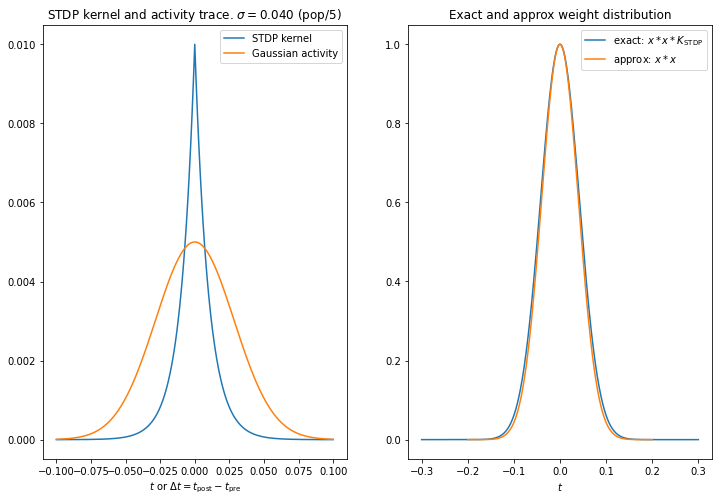

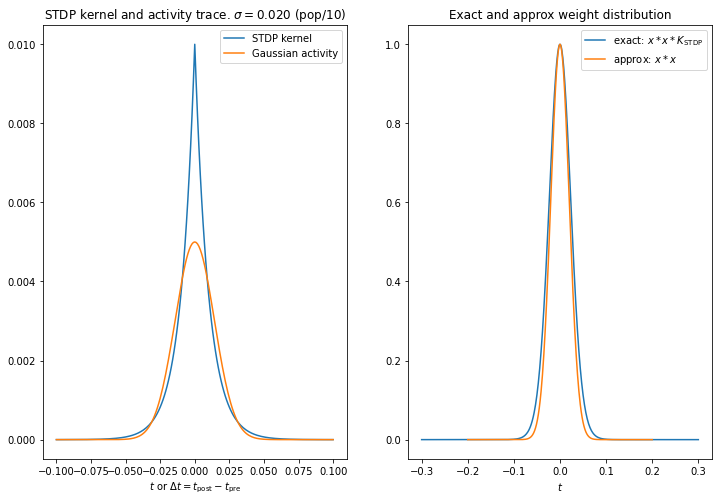

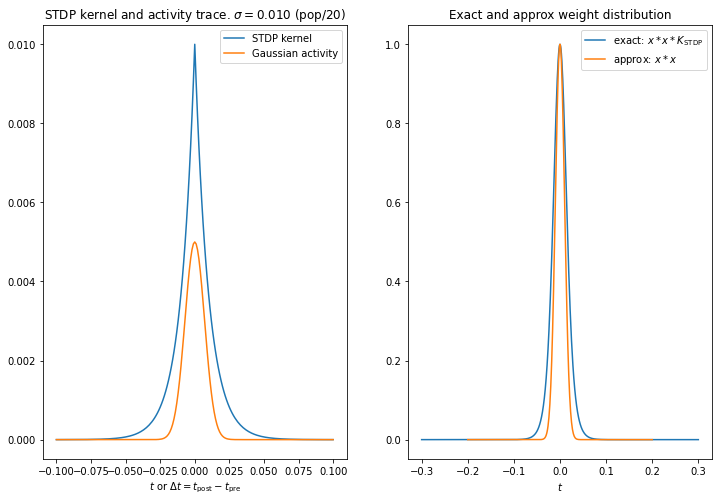

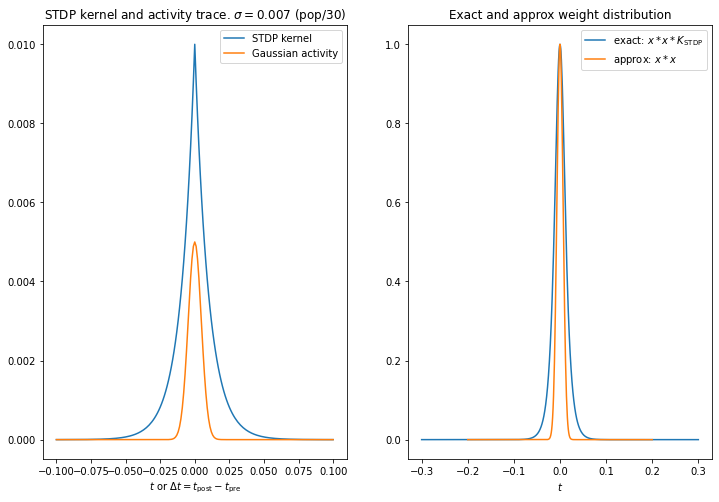

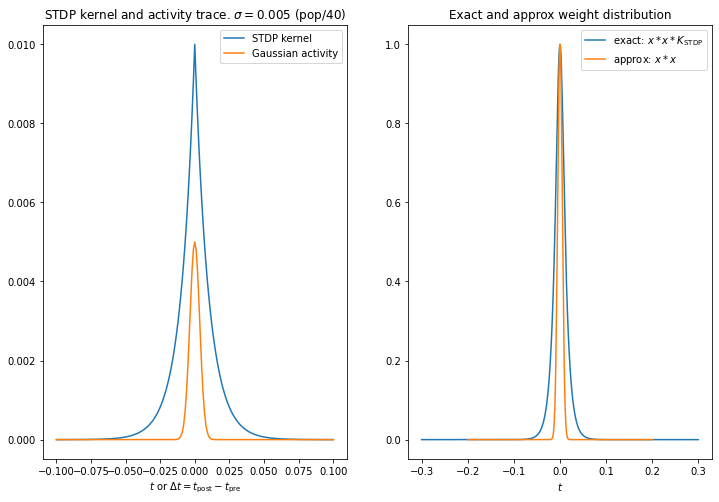

In [26]:
A_plus = 1e-2
A_minus = 1e-2
tau_stdp = 10e-3
num_neurons = 200
dt = 1e-3

# simulation parameters
num_neurons = 200
bump_speed = 1 # neurons / ms
period = num_neurons // bump_speed # ms

stdp_kernel = lambda delta_t: (A_plus * (delta_t > 0) + A_minus * (delta_t < 0) + (A_minus + A_plus)/2 * (delta_t == 0)) * np.exp(-abs(delta_t) / tau_stdp)
gaussian = lambda t,sigma: 1/(sigma*np.sqrt(2*np.pi)) * np.exp(- (t/sigma)**2)
correlate = lambda x, y: np.correlate(x, y, 'full')

scale = lambda x: x / x.max()

delta_t = np.arange(-period//2,period//2+1) * dt

for n in [5,10,20,30,40]:
	sigma = period/1000/n
	g = gaussian(delta_t,sigma)

	fig, (ax0, ax1) = plt.subplots(1, 2)
	ax0.plot(delta_t, stdp_kernel(delta_t), label='STDP kernel')
	ax0.plot(delta_t,A_plus/2*scale(g), label='Gaussian activity')
	ax0.set_xlabel(r'$t$ or $\Delta t = t_{\rm{post}} - t_{\rm{pre}}$')
	ax0.set_title(f'STDP kernel and activity trace. $\\sigma = {sigma:.3f}$ (pop/{n})')
	ax0.legend()

	ax1.plot(np.linspace(-0.3,0.3,601), scale(correlate(correlate(stdp_kernel(delta_t), g), g)), label=r'exact: $x * x * K_{\rm{STDP}}$')
	ax1.plot(np.linspace(-0.2,0.2,401), scale(correlate(g,g)), label=r'approx: $x * x$')
	ax1.set_xlabel(r'$t$')
	ax1.set_title('Exact and approx weight distribution')
	ax1.legend()
	plt.show()

The results are the same as for the asymmetric kernel.

For large values of the Gaussian activity standard deviation (population size / 5) the activity trace varies slowly over the timescale of the Hebbian kernel, so the Taylor series approximation is close and the approximate weight distribution matches the exact.

For small values of the Gaussian activity standard deviation (population size / 40) the activity trace varies quickly over the timescale of the Hebbian kernel, so the Taylor series approximation is not so close. In this case the exact weight distribution tends to looks like the STDP kernel (because it is convolved with a narrow Gaussian, which acts somewhat like a dirac delta).

For the approximation to be fairly accurate, the standard deviation of the Gaussian activity kernel should be at least double the time constant of the exponentially decaying kernel.